___

<a href='https://aims.edu.gh/'> <img src='http://gh.nexteinstein.org/wp-content/uploads/sites/15/2016/09/logo.jpg' /></a>
___


# Import the needed libraries

In [146]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
train_df=pd.read_csv('train.csv') #we use this dataset to train our model
test_df=pd.read_csv('test.csv') #we will use this data set later to validate our model

#Combined both training and test
Combined_df=pd.concat([train_df,test_df])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [147]:
# Confirm you have the right data and the combination is fine.
print('The shape of the train dataset is:',train_df.shape)
print('The shape of the test dataset is:',test_df.shape)
print('The shape of the combined dataset is:',Combined_df.shape)

The shape of the train dataset is: (175000, 14)
The shape of the test dataset is: (83210, 15)
The shape of the combined dataset is: (258210, 15)


In [148]:
Combined_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258210 entries, 0 to 83209
Data columns (total 15 columns):
country                  258146 non-null object
description              258210 non-null object
designation              181120 non-null object
id                       258210 non-null int64
index                    83210 non-null float64
points                   258210 non-null float64
price                    175000 non-null float64
province                 258146 non-null object
region_1                 215793 non-null object
region_2                 110996 non-null object
taster_name              96479 non-null object
taster_twitter_handle    91559 non-null object
title                    120975 non-null object
variety                  258209 non-null object
winery                   258210 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


In [149]:
Combined_df.head()

,country,description,designation,id,index,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,32027,NaN,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos
1,France,"A solid, chunky wine, with a structure that is...",NaN,71079,NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier
2,France,"This is powerful and concentrated, with the hi...",NaN,32440,NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,124405,NaN,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,33649,NaN,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline


In [150]:
train_df.describe()

,points,price,id
count,175000.000000,175000.000000,175000.000000
mean,88.083987,34.304400,70684.047240
std,3.157001,38.398146,41341.638798
min,79.636128,4.000000,1.000000
25%,85.971283,16.000000,35020.000000
50%,87.981631,25.000000,70256.500000
75%,90.085631,40.000000,105550.250000
max,100.220603,2500.000000,150929.000000


# Missing Values

In [151]:
total = Combined_df.isnull().sum().sort_values(ascending = False)
percent = (Combined_df.isnull().sum()/Combined_df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
index,175000,67.774292
taster_twitter_handle,166651,64.540878
taster_name,161731,62.635452
region_2,147214,57.013284
title,137235,53.148600
price,83210,32.225708
designation,77090,29.855544
region_1,42417,16.427327
province,64,0.024786
country,64,0.024786


The most missing values are in region, destination, tester name and price columns.

I'm worried the most about wines with NaN in price columns. We don't want to predict points for wines which price are undeclared. In this case, the prices with NAs are from the test data. Thus, we won't drop them.

Usefulness of other columns will be investigate on the Feature extraction stage. Maybe that NaN values are meaningful for particular columns..

## EDA

What country has the best wine? What country has the worst?

In [209]:
def category_plot(data, cat, col):
    avg = data.groupby(cat, as_index = False)[col].mean()
    avg.set_index(cat, inplace = True)
    best = avg.nlargest(5, col)
    worst = avg.nsmallest(5, col)
    fig, ax = plt.subplots(1,2,figsize = (12,3))
    # Reverse so the plot looks nicer; the "best" will be on top
    best = best.iloc[::-1]
    best.plot(kind = "barh", ax= ax[0], color="#3F5D7D",
              fontsize = 14, legend = False, title = "Best " + cat + " by " + col)
    worst.plot(kind = "barh", ax=ax[1], color="#3F5D7D",
               fontsize = 14, legend = False, title = "Worst " + cat + " by " + col)
    ax[0].title.set_size(16) # Set title size
    ax[1].title.set_size(16)
    plt.tight_layout()
    plt.savefig('plot.png')
    plt.show()

In [198]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [199]:
def display_dfs(data, cat, col):
    avg_df = data.groupby(cat, as_index=False)[col].mean().sort_values(by = col, ascending = False)
    avg_df = avg_df.dropna(axis = 0) # control for NaN
    # top 5
    df1 = avg_df.head()
    # bottom 5
    df2 = avg_df.tail()
    display_side_by_side(df1,df2)

### Country with the best and worst wine, by points, on average.¶


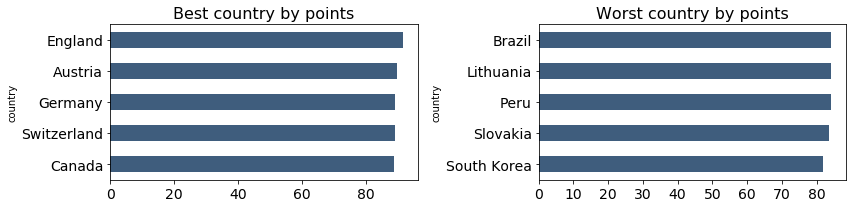

In [200]:
#display_dfs(train_df, "country", "points")
category_plot(train_df, "country", "points")

### Country with the most expensive and cheapest wine, on average.¶


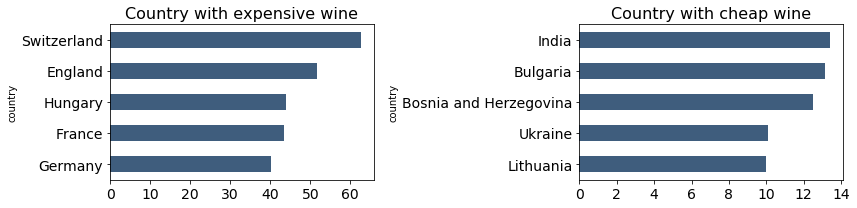

In [206]:
#display_dfs(train_df, "country", "price")
category_plot(train_df, "country", "price")

### Price by variety. Maybe some varities are more expensive? And, is the cheapest wine also the worst? Is the best wine also the most expensive?¶


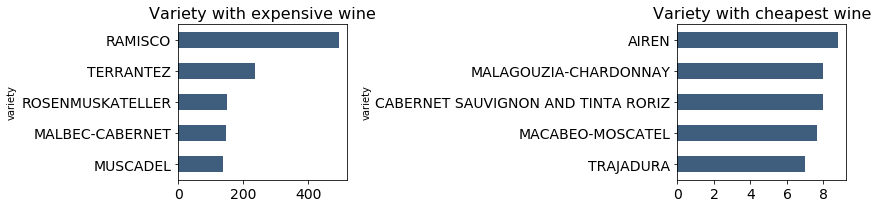

In [210]:
#display_dfs(train_df, "variety", "price")
category_plot(train_df, "variety", "price")

# Feature Engineering

In [137]:
# Convert variables to categories with label encoding
Combined_df["designation"] = Combined_df["designation"].astype('category').cat.codes
Combined_df["province"] = Combined_df["province"].astype('category').cat.codes
Combined_df["region_1"] = Combined_df["region_1"].astype('category').cat.codes
Combined_df["region_2"] = Combined_df["region_2"].astype('category').cat.codes
Combined_df["title"] = Combined_df["title"].astype('category').cat.codes
Combined_df["variety"] = Combined_df["variety"].astype('category').cat.codes
Combined_df["winery"] = Combined_df["winery"].astype('category').cat.codes

In [138]:
#Applying one hot encoding in some variables
Combined_df = pd.get_dummies(Combined_df, columns = ['country','taster_twitter_handle'], drop_first = True)

In [69]:
Combined_df.shape

(258210, 819)

## TF- IDF

In [70]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [71]:
#Train tfidf and svd
tf = TfidfVectorizer(stop_words='english')

svd = TruncatedSVD(n_components=5)

def transform_text(data, col):
    #Fit tfidf and svd, and transform training data
    tfidf_matrix = tf.fit_transform(data[col])
    lsa_features = pd.DataFrame(svd.fit_transform(tfidf_matrix))

    #Creat meaningful column names
    collist = map(str, range(0, 5))
    collist = ["latent_" + col + '_' + s for s in collist]
    lsa_features.columns = collist
    lsa_features = lsa_features.set_index(data.index)
    return lsa_features

lsa_features = transform_text(Combined_df, 'description') #this is the reduced features from the description column

In [72]:
lsa_features.head()

,latent_description_0,latent_description_1,latent_description_2,latent_description_3,latent_description_4
0,0.216267,0.009842,0.205410,-0.076283,-0.050708
1,0.226328,-0.045308,0.120272,-0.011149,-0.083990
2,0.218478,-0.128571,0.171616,-0.014873,-0.152442
3,0.149738,-0.088167,0.012866,0.085328,-0.069703
4,0.144091,0.082410,-0.032871,0.009524,0.007647


In [73]:
#Add description features to dataframe
Combined_df_new=pd.concat([Combined_df,lsa_features],axis=1)

In [74]:
train_df_new=Combined_df_new.iloc[0:len(train_df),]
test_df_new=Combined_df_new.iloc[len(train_df):,]

In [75]:
y=train_df_new[['price']]
X=train_df_new.drop(['description', 'price','id','index' ],axis=1)
x_test=test_df_new.drop(['description', 'price','id','index' ],axis=1) #xtest for test data---

In [76]:
X.head()

,designation,points,province,region_1,region_2,taster_name,title,winery,text length,raw_word_len,...,taster_twitter_handle_@vossroger,taster_twitter_handle_@wawinereport,taster_twitter_handle_@wineschach,taster_twitter_handle_@winewchristina,taster_twitter_handle_@worldwineguys,latent_description_0,latent_description_1,latent_description_2,latent_description_3,latent_description_4
0,42041,88.870874,8,-1,-1,-1,-1,9470,267,46,...,0,0,0,0,0,0.216267,0.009842,0.205410,-0.076283,-0.050708
1,-1,88.041695,38,582,-1,-1,-1,4345,225,41,...,0,0,0,0,0,0.226328,-0.045308,0.120272,-0.011149,-0.083990
2,-1,94.085021,38,983,-1,-1,-1,3564,199,33,...,0,0,0,0,0,0.218478,-0.128571,0.171616,-0.014873,-0.152442
3,39632,89.869797,53,1014,1,-1,53573,9532,187,31,...,0,0,0,0,0,0.149738,-0.088167,0.012866,0.085328,-0.069703
4,25325,89.017651,468,536,3,16,95520,15765,290,51,...,0,1,0,0,0,0.144091,0.082410,-0.032871,0.009524,0.007647


# Feature Scaling


In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
X_test = pd.DataFrame(sc.transform(X_test))


/usr/lib/python3/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int8, uint8, int16, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/lib/python3/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int8, uint8, int16, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int8, uint8, int16, int32, int64, float64 were all converted to float64 by StandardScaler.
  


## Model Training 

In [962]:
x_test=test_df_new.drop(['description', 'price','id','index' ],axis=1)

#transform test column
x_test = pd.DataFrame(sc.transform(x_test))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int8, uint8, int16, int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# RandomForest with K - FOLD

In [32]:
%%time
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

KF = KFold(n_splits = 10, shuffle = True, random_state=1)
preds_val = np.zeros([test_df_new.shape[0],])

for i,(train_ind, test_ind) in enumerate(KF.split(X)):
    print('========Fold',i)
    Xtrain, XCV, ytrain, yCV = X.iloc[train_ind], X.iloc[test_ind], y.values[train_ind], y.values[test_ind]
    
    regressor = RandomForestRegressor(n_estimators=50, random_state=42)
    regressor.fit(Xtrain, ytrain)
    preds_val += regressor.predict(x_test)/10

    pred = regressor.predict(XCV)
    print('RMSE :', np.sqrt(metrics.mean_squared_error(pred, yCV)))

========Fold 0


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RMSE : 20.11633145708801
========Fold 1


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RMSE : 26.721061601665458
========Fold 2


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RMSE : 21.448491114961243
========Fold 3


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RMSE : 26.935118397045464
========Fold 4


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RMSE : 18.80061817099184
========Fold 5


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RMSE : 24.708114266948247
========Fold 6


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RMSE : 25.752983401096326
========Fold 7


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RMSE : 21.326349878830314
========Fold 8


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RMSE : 21.584473173358404
========Fold 9


/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RMSE : 20.452327618286244
CPU times: user 18min 58s, sys: 132 ms, total: 18min 58s
Wall time: 18min 58s


In [34]:
predictions_rfr=pd.DataFrame({'id':range(len(test_df)),'price':preds_val})

In [35]:
np.mean(predictions_rfr['price'])

34.68908568681648

# XGBoost with K - FOLD

In [117]:
%%time
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn import metrics

KF = KFold(n_splits = 10, shuffle = True, random_state=1)
preds = np.zeros([test_df_new.shape[0],])
#K-Fold
params = {'eta': 0.4, 'max_depth':6 , 'objective': 'reg:linear',
          'eval_metric': 'rmse', 'seed': 99, 'alpha':2}

for i,(train_ind, test_ind) in enumerate(KF.split(X)):
    print('========Fold',i)
    Xtrain, XCV, ytrain, yCV = X.iloc[train_ind], X.iloc[test_ind], y.values[train_ind], y.values[test_ind]
    
    model = xgb.train(params, xgb.DMatrix(Xtrain, ytrain), 200, maximize=False)

    preds += (model.predict(xgb.DMatrix(x_test)))/10

    pred = model.predict(xgb.DMatrix(XCV))
    print('logloss :', np.sqrt(metrics.mean_squared_error(pred, yCV)))

========Fold 0
[11:41:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
logloss : 22.001866077893844
========Fold 1
[11:50:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
logloss : 24.469343538760445
========Fold 2
[11:59:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
logloss : 22.48433378295003
========Fold 3
[12:08:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
logloss : 29.12200244903267
========Fold 4
[12:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
logloss : 21.551018475285865
========Fold 5
[12:26:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
loglo

In [36]:
predictions_xgb=pd.DataFrame({'id':range(len(test_df)),'price':preds})

In [37]:
np.mean(predictions_xgb['price'])

34.160519793180775

In [38]:
## Combined predictions
predsfinal=(predictions_xgb['price']+predictions_rfr['price'])/2

In [39]:
np.mean(predsfinal)

34.42480273999864

In [41]:
predsfinal_df=pd.DataFrame({'id':range(len(test_df)),'price':predsfinal})

In [42]:
predsfinal_df.to_csv('predictions.csv',index=False)